#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

## 5장 Covariance and PCA

## 5.1 공분산(Covariance matrices)

In [1]:
## import libraries for the entire chapter
import numpy as np
# create data
n = 200
X = np.random.randn(n,4)

# mean-center
X = X-np.mean(X,axis=0) 

# covariance
covM = X.T@X / (n-1) 

# standard deviations matrix
stdM = np.linalg.inv( np.diag(np.std(X,axis=0,ddof=1)) )

# "manual" correlation matrix
corM = stdM@ X.T@X @stdM / (n-1) 

# compare ours against numpy's
print(np.round(covM-np.cov(X.T),3)), print(' ')
print(np.round(corM-np.corrcoef(X.T),3))

[[ 0. -0. -0.  0.]
 [-0.  0.  0.  0.]
 [-0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
 
[[ 0.  0. -0.  0.]
 [-0.  0. -0.  0.]
 [-0. -0. -0.  0.]
 [ 0.  0. -0. -0.]]


## 5.2 주성분 분석(Principal components analysis)

In [3]:
## import libraries for the entire chapter
import numpy as np
import matplotlib.pyplot as plt

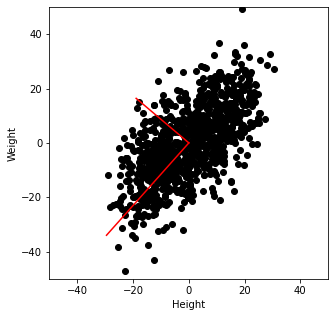

In [4]:
# create data
N = 1000
h = np.linspace(150,190,N) + np.random.randn(N)*5
w = h*.7 - 50 + np.random.randn(N)*10

# covariance
X = np.vstack((h,w)).T
X = X-np.mean(X,axis=0)
C = X.T@X / (len(h)-1)

# PCA
eigvals,V = np.linalg.eig(C)
i = np.argsort(eigvals)[::-1]
V = V[:,i]
eigvals = eigvals[i]
eigvals = 100*eigvals/np.sum(eigvals)
scores = X@V # not used, but useful code

# plot data with PCs
fig = plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'ko')
plt.plot([0,V[0,0]*45],[0,V[1,0]*45],'r')
plt.plot([0,V[0,1]*25],[0,V[1,1]*25],'r')
plt.xlabel('Height'), plt.ylabel('Weight')
plt.axis([-50,50,-50,50])
plt.show()

In [6]:
# re-mean-center
X = X-np.mean(X,axis=0)

# SVD
U,s,Vv = np.linalg.svd(X) # Vv == V
scores = X@Vv.T

# convert to percent variance
s = s**2 / (len(X)-1)
s = 100*s/sum(s) # s == eigvals
s

array([82.29219329, 17.70780671])